In [2]:
import sys
print('Python : {}'.format(sys.version))
import scipy as sc
print('Scipy : {}',format(sc.__version__))
import matplotlib as mt
print('Matplotlib : {}',format(mt.__version__))
import numpy as np
print('Numpy : {}',format(np.__version__))
import pandas as pd
print('Pandas : {}',format(pd.__version__))
import sklearn 
print('SKlearn : {}',format(sklearn.__version__))

Python : 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scipy : {} 1.4.1
Matplotlib : {} 3.1.3
Numpy : {} 1.18.1
Pandas : {} 1.0.1
SKlearn : {} 0.22.1


In [23]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#used in evaluating
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#importing algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
#google UCI repository

In [24]:
# loading data from the web
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
dataset = read_csv(url, names = names)

In [25]:
#understanding dimensions of the data
#instances== rows
#attributes== columns
print(dataset.shape)

(150, 5)


In [26]:
dt = pd.DataFrame(dataset)
dt.head(50)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
print(dataset.describe())
# description of the numerical data

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [28]:
print(dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


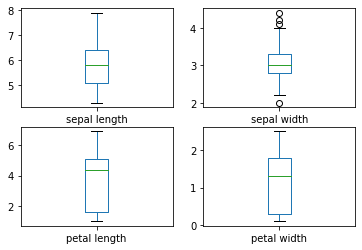

In [36]:
#univariate plots- box and whisker
dataset.plot(kind = 'box', subplots = True , layout = (2,2), sharex = False , sharey = False)
pyplot.show()

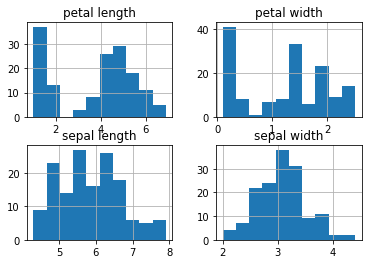

In [30]:
dataset.hist()
pyplot.show()

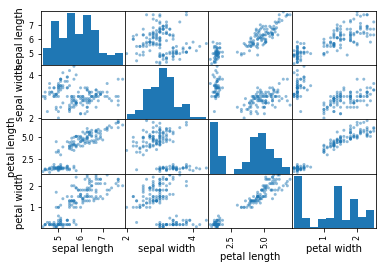

In [31]:
scatter_matrix(dataset)
pyplot.show()

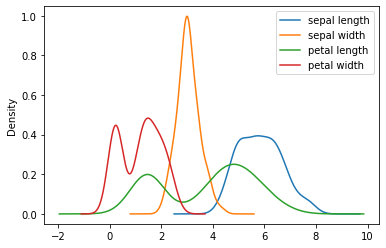

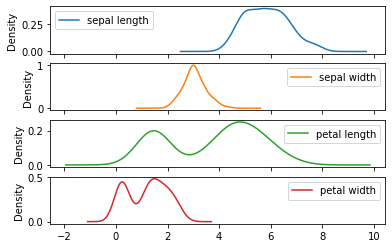

In [41]:
#kernel density estimation plots
dataset.plot(kind = 'kde' )
pyplot.show()
dataset.plot(kind = 'kde', subplots = True )
pyplot.show()

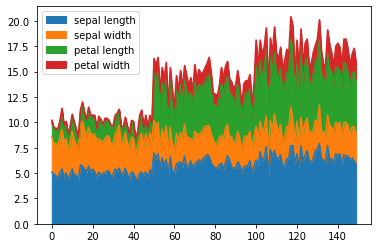

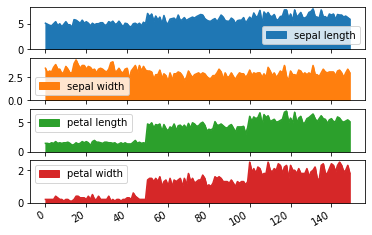

In [45]:
dataset.plot(kind = 'area' )
pyplot.show()
dataset.plot(kind = 'area', subplots = True )
pyplot.show()

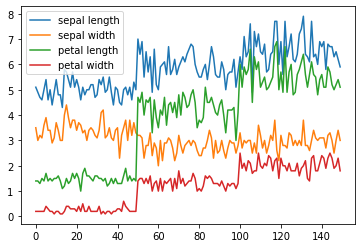

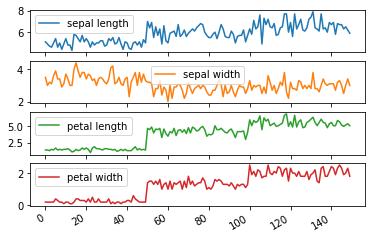

In [49]:
dataset.plot(kind = 'line')
pyplot.show()
dataset.plot(kind = 'line', subplots = True )
pyplot.show()

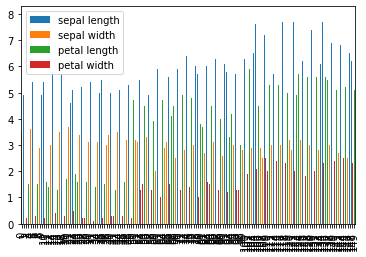

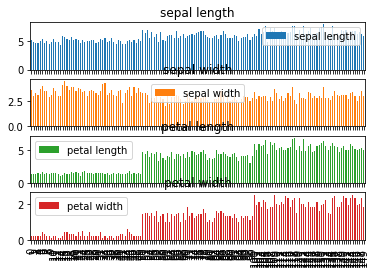

In [54]:
#scatter, hexbin, require x and y labels
dataset.plot(kind = 'bar' )
pyplot.show()
dataset.plot(kind = 'bar', subplots = True )
pyplot.show()

In [55]:
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size = 0.2, random_state = 1)

In [71]:
#building the models

#linear models

models = []
#Logistic Regression
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "ovr")))
#Linear discriminant analysis
models.append(('LDA', LinearDiscriminantAnalysis()))

# non linear models

#KN neighbors
models.append(('KNN', KNeighborsClassifier()))
#gaussian NB

# was showing error:Cannot clone object '<class 'sklearn.naive_bayes.GaussianNB'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.
# so omitted

#support vector machines
models.append(('SVM', SVC(gamma= 'auto')))

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='ovr', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('SVM',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False))]

In [72]:
#model evaluation
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
SVM: 0.983333 (0.033333)


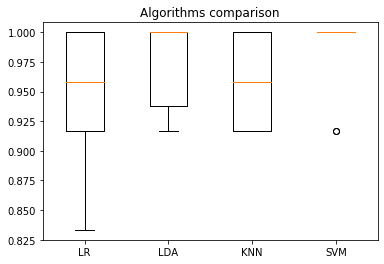

In [73]:
#comparing models
pyplot.boxplot(results, labels = names)
pyplot.title('Algorithms comparison')
pyplot.show()

In [75]:
# predictions on svs
model = SVC(gamma = 'auto')
model.fit(X_train, Y_train)
prediction = model.predict(X_validation)

In [76]:
#evaluating the prediction
print(accuracy_score(Y_validation, prediction))
print(confusion_matrix(Y_validation, prediction))
print(classification_report(Y_validation, prediction))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

